In [1]:
#imports libs and data
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pickle, json

from scipy.ndimage.filters import gaussian_filter1d as smooth

import Classes.LPPic_fields as fl
import Classes.LPPic as LP
import Classes.LPPic_newwalls as nw
from functions import (simpleplot, ne_Bolz, Te_eff_calcl, phi_drop,
                        sigma_maxw_unsat,
                        sigma_maxw_sat,
                        newSigma_maxw,)

import matplotlib as mpl
import matplotlib.pyplot as plt

qe = 1.6021766E-19
me =  9.109E-31 
mi = 219.6E-27
eps0 = 8.854187817e-12

run = pickle.load( open( "save_run.p", "rb" ) )
data_all = pickle.load( open( "save_data_all.p", "rb" ) )
PIC = pickle.load( open( "PICvalues.dat", "rb" ) )
savepath = "../images/"

sigma_0 = 0.5
sigma_max= 2.9

In [13]:
def returnTemean(run, start = 0.5):
    
    tmax = run._nT
    tmin = int(start*tmax)
    Nt = tmax - tmin + 1
    Temean = np.zeros((run._xmax+1,run._ymax+1))

    for t in np.arange(tmin,tmax):
        print(f"\r {t} over {tmax} time step",end = "")
        Temean += run.return_fromkey(t,'Eke(1)') + run.return_fromkey(t,'Eke(2)') + run.return_fromkey(t,'Eke(3)')
    
    Temean *= 2/3
    
    return Temean / Nt

def returnVmean(run, start = 0.5):
    
    tmax = run._nT
    tmin = int(start*tmax)
    Nt = tmax - tmin + 1
    nmean = np.zeros((run._xmax+1,run._ymax+1))
    J1mean = np.zeros((run._xmax+1,run._ymax+1))
    J2mean = np.zeros((run._xmax+1,run._ymax+1))
    J3mean = np.zeros((run._xmax+1,run._ymax+1))
    
    for t in np.arange(tmin,tmax):
        print(f"\r {t} over {tmax} time step",end = "")
        
        ntemp = run.return_fromkey(t,'Nume') 
        nmean += ntemp
        J1mean += run.return_fromkey(t,'Je(1)') / ntemp
        J2mean += run.return_fromkey(t,'Je(2)') / ntemp
        J3mean += run.return_fromkey(t,'Je(3)') / ntemp
        
    
    return nmean/Nt, -J1mean/qe_v/Nt, -J2mean/qe_v/Nt, -J3mean/qe_v/Nt

def returnPhimean(run, start = 0.5):
    
    tmax = run._nT
    tmin = int(start*tmax)
    Nt = tmax - tmin + 1
    Temean = np.zeros((run._xmax+1,run._ymax+1))

    for t in np.arange(tmin,tmax):
        print(f"\r {t} over {tmax} time step",end = "")
        Temean += run.return_fromkey(t,'Phi')
        
    return Temean / Nt

In [25]:
#folders = ["131_eps50",
#          "132_eps45",
#          #"133_eps25",
#          "134_eps10",
#          "135_eps200",
#          "136_LongX",
#          ]
folders = ["134_eps10"]
root = "/run/media/tavant/Data3/"
#root = "/home/tavant/Data/R_theta/"

paths = [root + fol +"/" for fol in folders]

In [26]:
run = fl.field(paths[0])
Phi = returnPhimean(run)

found 80 files
 79 over 80 time step

(0, 10)

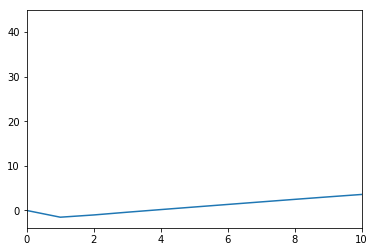

In [27]:
plt.plot(Phi.mean(axis = 0))
plt.xlim(0, 10)

In [28]:
print(Phi.mean(axis = 0).min())

-1.6667414503393099
